Validation Mean Squared Error: 0.0018
Test Mean Squared Error: 0.0018


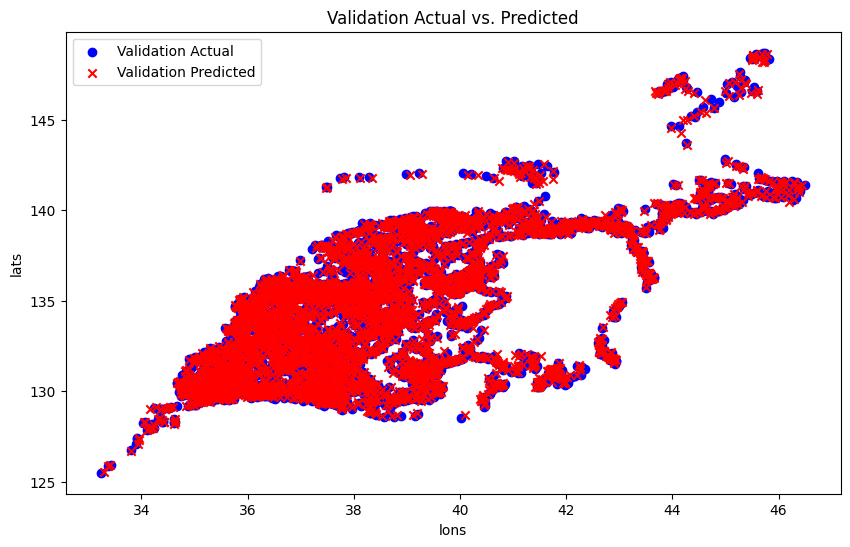

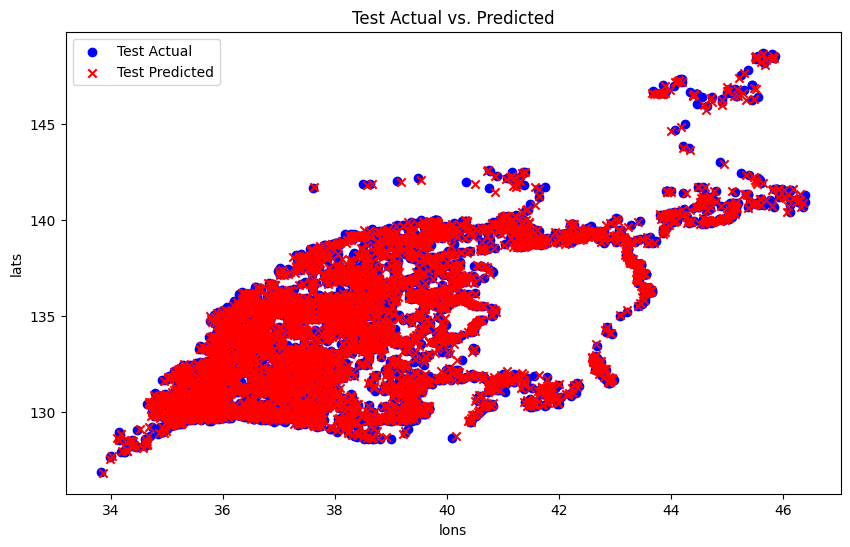

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 데이터 읽기
df = pd.read_csv('data/data_drifter.csv')

# 데이터 분할
X = df[['time', 'lons', 'lats', 'uo', 'vo', 'u10', 'v10', 'next_time']]
y = df[['next_lons', 'next_lats']]

# 데이터 정규화
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# 데이터를 훈련, 검증 및 테스트 세트로 나누기
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.6, random_state=None)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=None)

# ElasticNet 모델 생성
elasticnet_model = ElasticNet(alpha=0.0001, l1_ratio=0.1)  # alpha는 전체 규제 강도, l1_ratio는 L1 규제의 비율을 나타냅니다.

# 모델 훈련
elasticnet_model.fit(X_train, y_train)

# 예측
y_pred_val = elasticnet_model.predict(X_val)
y_pred_test = elasticnet_model.predict(X_test)

# 예측 결과 복원 (정규화를 원래 스케일로 되돌림)
y_pred_val_restored = scaler_y.inverse_transform(y_pred_val)
y_pred_test_restored = scaler_y.inverse_transform(y_pred_test)
y_val_restored = scaler_y.inverse_transform(y_val)
y_test_restored = scaler_y.inverse_transform(y_test)

# 평가
mse_val = mean_squared_error(y_val_restored, y_pred_val_restored)
mse_test = mean_squared_error(y_test_restored, y_pred_test_restored)

print(f"Validation Mean Squared Error: {mse_val:.4f}")
print(f"Test Mean Squared Error: {mse_test:.4f}")

# Scatter plot으로 검증 데이터 실제 값과 예측값 표시
plt.figure(figsize=(10, 6))
plt.scatter(y_val_restored[:, 1], y_val_restored[:, 0], label='Validation Actual', c='blue', marker='o')
plt.scatter(y_pred_val_restored[:, 1], y_pred_val_restored[:, 0], label='Validation Predicted', c='red', marker='x')
plt.xlabel('lons')
plt.ylabel('lats')
plt.title('Validation Actual vs. Predicted')
plt.legend()
plt.show()

# Scatter plot으로 테스트 데이터 실제 값과 예측값 표시
plt.figure(figsize=(10, 6))
plt.scatter(y_test_restored[:, 1], y_test_restored[:, 0], label='Test Actual', c='blue', marker='o')
plt.scatter(y_pred_test_restored[:, 1], y_pred_test_restored[:, 0], label='Test Predicted', c='red', marker='x')
plt.xlabel('lons')
plt.ylabel('lats')
plt.title('Test Actual vs. Predicted')
plt.legend()
plt.show()
